In [15]:
import pandas as pd
import numpy as np

# Charger les données
data = pd.read_csv('Social_Network_Ads.csv')

# Variables explicatives : Age et EstimatedSalary
X = data[['Age', 'EstimatedSalary']].values

# Variable cible : Purchased
y = data['Purchased'].values

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Mise à l'échelle
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

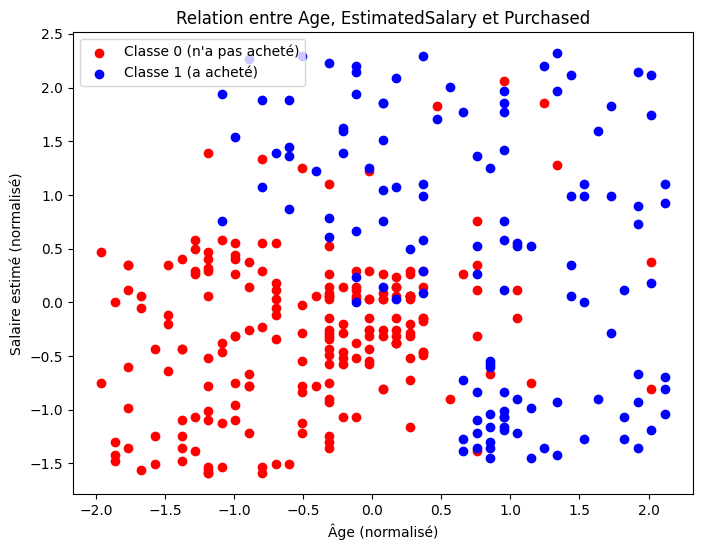

In [17]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Classe 0 (n\'a pas acheté)')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Classe 1 (a acheté)')
plt.xlabel('Âge (normalisé)')
plt.ylabel('Salaire estimé (normalisé)')
plt.legend()
plt.title('Relation entre Age, EstimatedSalary et Purchased')
plt.show()

In [24]:
from sklearn.svm import SVC
# Faible régularisation : C=0.01
svm_classifier_low_C = SVC(kernel='linear', C=0.01)
svm_classifier_low_C.fit(X_train, y_train)

# Régularisation modérée : C=1
svm_classifier_medium_C = SVC(kernel='linear', C=1)
svm_classifier_medium_C.fit(X_train, y_train)

# Forte régularisation : C=1000
svm_classifier_high_C = SVC(kernel='linear', C=1000)
svm_classifier_high_C.fit(X_train, y_train)

SVC(C=1000, kernel='linear')

In [25]:
# Prédictions sur l'ensemble de test pour chaque modèle
y_pred_low_C = svm_classifier_low_C.predict(X_test)
y_pred_medium_C = svm_classifier_medium_C.predict(X_test)
y_pred_high_C = svm_classifier_high_C.predict(X_test)

# Comparer les classes réelles et prédites
print("Classes réelles :", y_test.tolist())
print("\nPrédictions avec faible régularisation (C=0.01) :", y_pred_low_C.tolist())
print("Prédictions avec régularisation modérée (C=1) :", y_pred_medium_C.tolist())
print("Prédictions avec forte régularisation (C=1000) :", y_pred_high_C.tolist())

Classes réelles : [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1]

Prédictions avec faible régularisation (C=0.01) : [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Prédictions avec régularisation modérée (C=1) : [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
Prédictions avec forte régularisation (C=1000) : [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

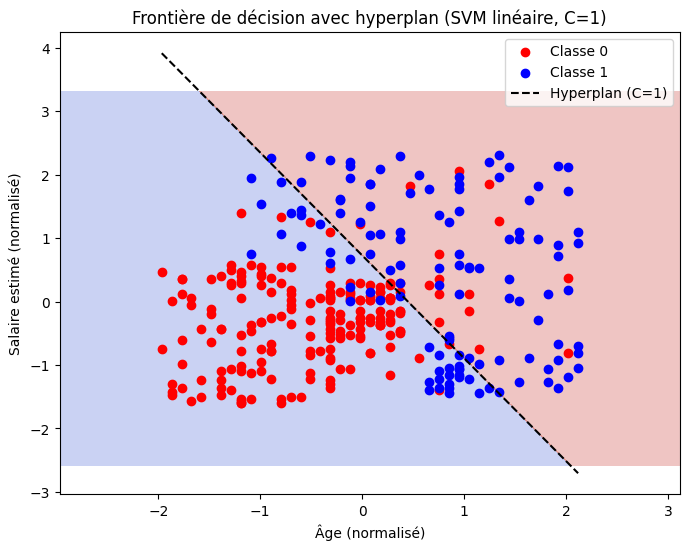

In [ ]:
# Extract coefficients and intercept from the SVM classifier
w = svm_classifier_medium_C.coef_[0]  # Weights of the hyperplane
b = svm_classifier_medium_C.intercept_[0]  # Intercept of the hyperplane

# Calculate decision boundary (hyperplane) points
x_hyperplane = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)  # Range for x-axis
y_hyperplane = -(w[0] * x_hyperplane + b) / w[1]  # Solve for y: w1*x + w2*y + b = 0

# Plot the decision boundary and hyperplane
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, decision_boundary, alpha=0.3, cmap='coolwarm')  # Decision regions
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Classe 1')
plt.plot(x_hyperplane, y_hyperplane, color='black', linestyle='--', label='Hyperplan (C=1)')
plt.title('Frontière de décision avec hyperplan (SVM linéaire, C=1)')
plt.xlabel('Âge (normalisé)')
plt.ylabel('Salaire estimé (normalisé)')
plt.legend()
plt.show()


Ce qu'on observe :

Une droite séparatrice (hyperplan) est tracée.
Les points situés d'un côté de la droite sont classés comme 0 (n'a pas acheté) et ceux de l'autre côté comme 1 (a acheté).

In [27]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# Prédictions sur l'ensemble de test pour chaque modèle
y_pred_low_C = svm_classifier_low_C.predict(X_test)
y_pred_medium_C = svm_classifier_medium_C.predict(X_test)
y_pred_high_C = svm_classifier_high_C.predict(X_test)

# Calcul de la précision, rappel et F1-score sur l'ensemble de test
accuracy_low_C = accuracy_score(y_test, y_pred_low_C)
accuracy_medium_C = accuracy_score(y_test, y_pred_medium_C)
accuracy_high_C = accuracy_score(y_test, y_pred_high_C)

recall_low_C = recall_score(y_test, y_pred_low_C, average='binary')  # Si binaire, sinon utiliser 'macro' ou 'weighted'
recall_medium_C = recall_score(y_test, y_pred_medium_C, average='binary')
recall_high_C = recall_score(y_test, y_pred_high_C, average='binary')

f1_low_C = f1_score(y_test, y_pred_low_C, average='binary')  # Idem, utilise 'macro' ou 'weighted' selon le cas
f1_medium_C = f1_score(y_test, y_pred_medium_C, average='binary')
f1_high_C = f1_score(y_test, y_pred_high_C, average='binary')

# Calcul de la matrice de confusion pour chaque modèle
conf_matrix_low_C = confusion_matrix(y_test, y_pred_low_C)
conf_matrix_medium_C = confusion_matrix(y_test, y_pred_medium_C)
conf_matrix_high_C = confusion_matrix(y_test, y_pred_high_C)

# Affichage des résultats
print(f"Précision avec faible régularisation (C=0.01) : {accuracy_low_C:.2%}")
print(f"Rappel avec faible régularisation (C=0.01) : {recall_low_C:.2%}")
print(f"F1-score avec faible régularisation (C=0.01) : {f1_low_C:.2%}")
print(f"Matrice de confusion avec faible régularisation (C=0.01) :\n{conf_matrix_low_C}\n")

print(f"Précision avec régularisation modérée (C=1) : {accuracy_medium_C:.2%}")
print(f"Rappel avec régularisation modérée (C=1) : {recall_medium_C:.2%}")
print(f"F1-score avec régularisation modérée (C=1) : {f1_medium_C:.2%}")
print(f"Matrice de confusion avec régularisation modérée (C=1) :\n{conf_matrix_medium_C}\n")

print(f"Précision avec forte régularisation (C=1000) : {accuracy_high_C:.2%}")
print(f"Rappel avec forte régularisation (C=1000) : {recall_high_C:.2%}")
print(f"F1-score avec forte régularisation (C=1000) : {f1_high_C:.2%}")
print(f"Matrice de confusion avec forte régularisation (C=1000) :\n{conf_matrix_high_C}")


Précision avec faible régularisation (C=0.01) : 90.00%
Rappel avec faible régularisation (C=0.01) : 63.64%
F1-score avec faible régularisation (C=0.01) : 77.78%
Matrice de confusion avec faible régularisation (C=0.01) :
[[58  0]
 [ 8 14]]

Précision avec régularisation modérée (C=1) : 91.25%
Rappel avec régularisation modérée (C=1) : 72.73%
F1-score avec régularisation modérée (C=1) : 82.05%
Matrice de confusion avec régularisation modérée (C=1) :
[[57  1]
 [ 6 16]]

Précision avec forte régularisation (C=1000) : 91.25%
Rappel avec forte régularisation (C=1000) : 72.73%
F1-score avec forte régularisation (C=1000) : 82.05%
Matrice de confusion avec forte régularisation (C=1000) :
[[57  1]
 [ 6 16]]
